*What factors contribute to the success of the most streamed songs on Spotify in 2024?*



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter # to get the frequency of each word
import re #Removing Punctuation
from wordcloud import STOPWORDS, ImageColorGenerator #to filter out, common words
import wordcloud as WordCloud
import PIL.Image as PIL
import PIL
import seaborn as sns
import plotly.graph_objects as go#for radar chart
import plotly.express as px#for radar chart
import datetime


In [2]:
#file import
cleaned_file_upload = pd.read_csv("Most Streamed Spotify Songs 2024.csv", encoding='ISO-8859-1')
cleaned_file_upload.head(5)

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
# Handle missing values
cleaned_file_upload['Release Date']=pd.to_datetime(
	cleaned_file_upload['Release Date'], format = "%m/%d/%Y"
	)
cleaned_file_upload.head(5)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


***Most commom words per track name***

In [4]:
# Convert all track names to look the same 
cleaned_file_upload['Track'] = cleaned_file_upload['Track'].str.lower()

In [5]:
# Function to remove punctuation and split into words
def remove_punctuation_and_split(track_name):
    # Remove punctuation using regex
    track_name_no_punct = re.sub(r'[^\w\s]', '', track_name)#The regular expression r'\b\w+\b' is used to find all sequences of word characters (alphanumeric characters plus underscores) that are surrounded by word boundaries in the string x.
    # Split the track name into words
    words = track_name_no_punct.split()
    return words 

In [6]:
# Apply the function to the 'Track' column
cleaned_file_upload['Track'] = cleaned_file_upload['Track'].apply(remove_punctuation_and_split)

In [7]:
# Combine all words into a single list
all_words = [word for Track in cleaned_file_upload['Track'] for word in Track]

#filter out common words
filtered_words = [word for word in all_words if word not in STOPWORDS]

word_counts = Counter(filtered_words)


In [8]:
#convert it to data frame
key_words = pd.DataFrame(
	word_counts.items(), columns = ['Key Word', "# of time it's used"]
	)
key_words = key_words.sort_values(
	by="# of time it's used", 
	ascending=False
	).reset_index(drop=True)
print(key_words.head(24))


   Key Word  # of time it's used
0      feat                  469
1      love                  131
2     remix                  102
3        la                   85
4      baby                   56
5        de                   52
6       lil                   49
7        el                   49
8      dont                   36
9        go                   33
10      bad                   32
11  version                   30
12       te                   30
13        2                   30
14      one                   29
15      que                   29
16     back                   28
17     know                   27
18     song                   27
19    music                   26
20    young                   26
21     girl                   25
22    heart                   24
23    cover                   24


***Summary of Insights:***

Collaboration and Remixing: High frequency of "feat" and "remix" indicates collaboration and remixing are significant trends. 

Language Influence: Presence of Spanish words suggests a strong influence of Latin music.
Branding: Use of "lil" and "young" points to branding in hip-hop. 

Themes of Love and Emotion: Common words like "love" and "heart" show recurring themes in music. 

Negative Themes: Words like "dont" and "bad" indicate themes of defiance or retrospection.

Multiple Versions: Words like "version" and "cover" reflect a trend of releasing multiple versions or covers of songs.


**Lets do a charts map to better visualize this:**


In [9]:
options = ("Bar, Pie, WordCloud, Hbar")
#ask 

user_visual_ choice = input("The options for data display are: " + options + " | How do you want your data to be displayed?: ")
spotify_green_variations = [ #Color optionas
        "#1B5E20",  # Darkest shade
        "#2E7D32",  # Even darker shade
        "#388E3C",  # Darker shade
        "#43A047",  # Another tone
        "#4CAF50",  # Lighter tint
        "#66BB6A",  # Slightly different tone
        "#81C784",  # Even lighter tint
        "#A5D6A7",  # Lightest tint
        "#1DB954",  # Spotify Green
        "#2EB05B"   # Yet another tone
    ]
index = 1
def chooseColor(*rest): #Color choice for wordcloud
        index += 1
        if index > 10:
            index = 1
        
        color_list = {}
        for word in key_words['Key Word'].head(10).values:
            color_list[index] = spotify_green_variations[index]
            index += 1
            if index > 10:
                index = 1
                
        return color_list

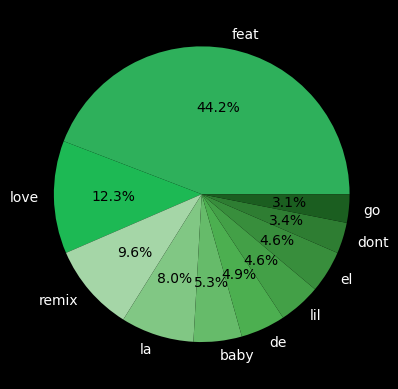

In [10]:
if user_visual_choice == 'Bar':
    fig, ax = plt.subplots()
    plt.bar( key_words['Key Word'].head(10),  height= key_words["# of time it's used"].head(10), color = [30/255, 215/255, 96/255])
    ax.set_facecolor("black")
    fig.patch.set_facecolor("black")
    ax.tick_params(axis='x', colors = 'White')
    ax.tick_params(axis='y', colors = 'White')
    ax.spines['bottom'].set_color('White')
    ax.spines['left'].set_color('White')

    plt.show

elif user_visual_choice == 'Pie':
    fig, ax = plt.subplots()
    pie = ax.pie( key_words["# of time it's used"].head(10),labels = key_words['Key Word'].head(10), autopct='%1.1f%%', colors=spotify_green_variations[::-1])
    ax.set_facecolor("White")
    fig.patch.set_facecolor("Black")
    for text in pie[1]:
        text.set_color('White')

    plt.show

elif user_visual_choice == 'WordCloud':

    # Generate a word cloud
    spotify_mask = np.array(
        PIL.Image.open("Spotify mask.png")
        )
    colormap = ImageColorGenerator(spotify_mask)

    wordcloud = WordCloud.WordCloud(
        width=800, height=400, 
        mask=spotify_mask, 
        contour_color='Black',background_color='Black'
        ).generate_from_frequencies(
            dict(
                word_counts.most_common(4000)
                ))
    
    wordcloud.recolor (color_func=colormap)
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off the axis
    plt.show()

elif user_visual_choice == 'Hbar':
    # Data for the most common words
    common_words_data = {
    'Word': ['feat', 'love', 'remix', 'la', 'baby', 'de', 'lil', 'el', 'dont', 'go', 'bad', 'version', 'te', '2', 'one', 'que', 'back', 'know', 'song', 'music', 'young', 'girl', 'heart', 'cover'],
    'Frequency': [469, 131, 102, 85, 56, 52, 49, 49, 36, 33, 32, 30, 30, 30, 29, 29, 28, 27, 27, 26, 26, 25, 24, 24]
    }

    # Create a DataFrame
    common_words_df = pd.DataFrame(common_words_data)

    # Plot the most common words
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frequency', y='Word', data=common_words_df)
    plt.title('Most Common Words in Track Names')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()





    


---------

Ignore this section
-------

-----

*Artist Comparision*

In [11]:
# Prompt the user for an artist's name
artist_name_1 = input("Please enter the  first artist's name: ")
artist_data_1 = cleaned_file_upload[cleaned_file_upload['Artist'].str.lower() == artist_name_1.lower()]
artist_name_2 = input("Who do you want to compare " + artist_name_1 + ' to?:')
artist_data_2 = cleaned_file_upload[cleaned_file_upload['Artist'].str.lower() == artist_name_2.lower()]

#get rid of , in spotify streams data
#1
artist_data_1['Spotify Streams'] = artist_data_1['Spotify Streams'].replace(',','', regex=True)
#2
artist_data_2['Spotify Streams'] = artist_data_2['Spotify Streams'].replace(',','', regex=True)

        
#solve data so that it is numbers not object 
#1
artist_data_1['Spotify Streams'] = pd.to_numeric(artist_data_1['Spotify Streams'], downcast = 'integer', errors='coerce')
artist_data_1['All Time Rank'] = pd.to_numeric(artist_data_1['All Time Rank'], downcast = 'integer', errors='coerce')
artist_data_1['Soundcloud Streams'] = pd.to_numeric(artist_data_1['Soundcloud Streams'], downcast='integer', errors='coerce')
#2
artist_data_2['Spotify Streams'] = pd.to_numeric(artist_data_2['Spotify Streams'], downcast = 'integer', errors='coerce')
artist_data_2['All Time Rank'] = pd.to_numeric(artist_data_2['All Time Rank'], downcast = 'integer', errors='coerce')
artist_data_2['Soundcloud Streams'] = pd.to_numeric(artist_data_2['Soundcloud Streams'], downcast='integer', errors='coerce')

#calculate the average values
#1
average_track_score_1 = artist_data_1['Track Score'].mean()
average_spotify_stream_1 = artist_data_1['Spotify Streams'].mean()/ 10000000
average_spotify_popularity_1 = artist_data_1['Spotify Popularity'].mean() 
average_soundcloud_stream_1 = artist_data_1['Soundcloud Streams'].mean() 
average_ATR_1 = artist_data_1['All Time Rank'].mean()
#2
average_track_score_2 = artist_data_2['Track Score'].mean()
average_spotify_stream_2 = artist_data_2['Spotify Streams'].mean()/ 10000000
average_spotify_popularity_2 = artist_data_2['Spotify Popularity'].mean() 
average_soundcloud_stream_2 = artist_data_2['Soundcloud Streams'].mean() 
average_ATR_2 = artist_data_2['All Time Rank'].mean()
        
#plot the radar charts
categories_radar = ['Average Track Score', 'Average Spotify Streams 1 is 10 million' ,'Average All Time Rank 1 is 10', 'Average SoundCloud Streams 1 is 1000']
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[average_track_score_1, average_spotify_stream_1, average_track_score_1, average_ATR_1 / 10, average_soundcloud_stream_1],
      theta=categories_radar,
      fill='toself',
      name= artist_name_1
))

fig.add_trace(go.Scatterpolar(
      r=[average_track_score_2, average_spotify_stream_2, average_track_score_2, average_ATR_2 / 10, average_soundcloud_stream_2],
      theta=categories_radar,
      fill='toself',
      name= artist_name_2
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=True
)

fig.show()

-------
lets move on
-----
------

Relationship between track score and other factors


For this to work, we need to clean the data differently

In [12]:
# Load the dataset with proper encoding
spotify_data = pd.read_csv('Most Streamed Spotify Songs 2024.csv' , encoding='ISO-8859-1')

#Drop the 'TIDAL Popularity' column as it is entirely empty
spotify_data.drop(columns=['TIDAL Popularity'], inplace=True)

# Data Cleaning: Convert numerical columns with commas to integers and handle NaN values
spotify_data['Spotify Streams'] = spotify_data['Spotify Streams'].replace(',','', regex=True).dropna().astype(int)
spotify_data['Spotify Playlist Count'] = spotify_data['Spotify Playlist Count'].str.replace(',', '').fillna(0).astype(int)
spotify_data['Spotify Playlist Reach'] = spotify_data['Spotify Playlist Reach'].str.replace(',', '').fillna(0).astype(int)
spotify_data['Pandora Streams'] = spotify_data['Pandora Streams'].str.replace(',', '').fillna(0).astype(int)
spotify_data['Shazam Counts'] = spotify_data['Shazam Counts'].str.replace(',', '').fillna(0).astype(int)




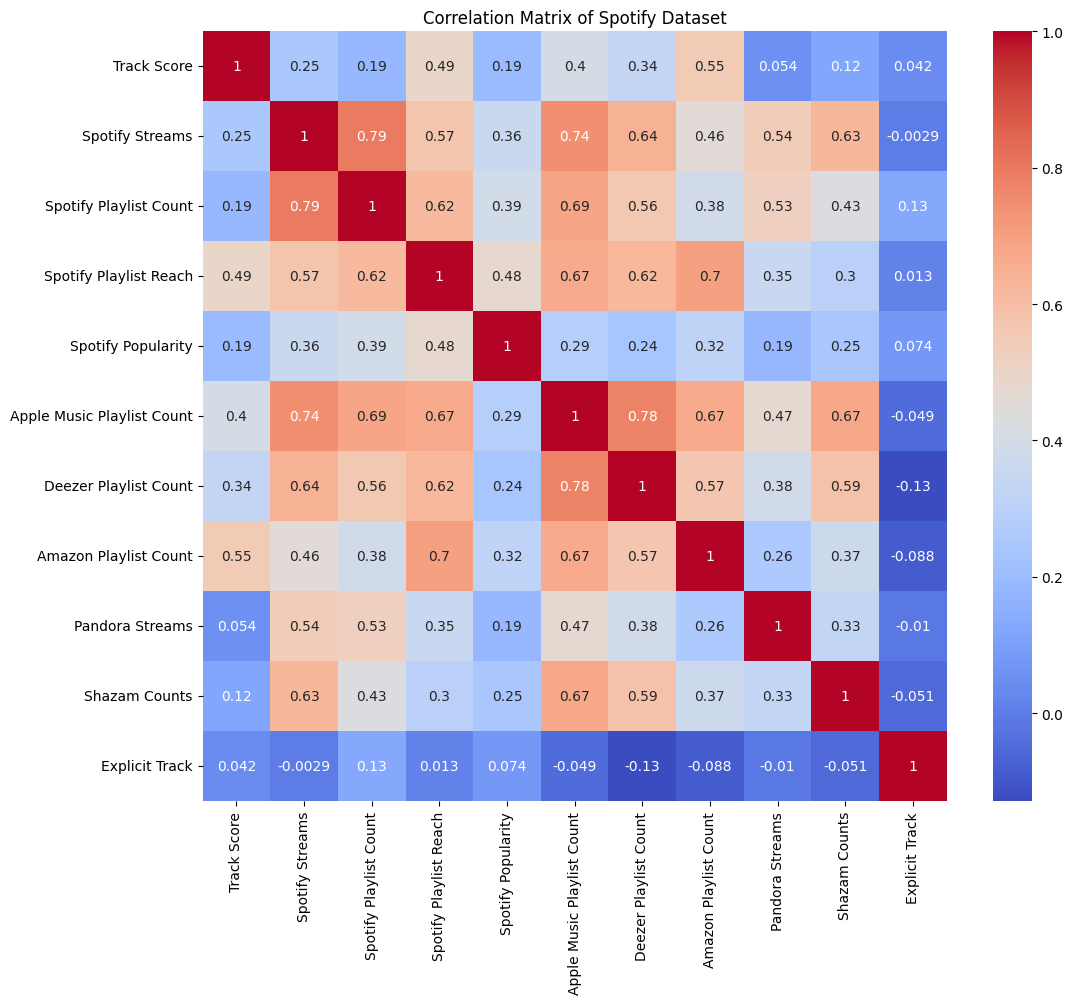

In [13]:

# Select only numeric columns
numeric_columns = spotify_data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Spotify Dataset')
plt.show()

**Observations**:
Spotify Streams and Playlist Metrics:

Spotify Streams is highly correlated with Spotify Playlist Count (0.80) and Spotify Playlist Reach (0.58). This indicates that songs included in more playlists and with higher playlist reach tend to have higher streaming numbers.
Spotify Streams also shows a strong correlation with Apple Music Playlist Count (0.74), suggesting a positive relationship between playlist inclusion across different platforms and streaming success.
Track Score and Metrics:

Track Score is moderately correlated with Spotify Playlist Reach (0.49) and Spotify Streams (0.24). This implies that higher-rated tracks are more likely to achieve greater reach and streams.
Cross-Platform Relationships:

Apple Music Playlist Count shows strong correlations with Spotify Playlist Count (0.69), Spotify Playlist Reach (0.67), and Spotify Streams (0.74). This suggests that songs popular on Apple Music playlists also perform well on Spotify.
Deezer Playlist Count and Amazon Playlist Count exhibit strong correlations with each other (0.78) and with other playlist metrics, indicating a possible trend of multi-platform playlisting.
Shazam Counts and Playlist Metrics:

Shazam Counts is moderately correlated with Spotify Streams (0.40) and Spotify Playlist Reach (0.30), suggesting that songs frequently identified on Shazam tend to perform well on Spotify.

---------------------------------------------------------------------------------------------

-----------------------------------------------------------

**compare the average stream counts of songs released in different years or months**

In [14]:
#Cleaning the data
cleaned_file_upload['Spotify Streams'] = cleaned_file_upload['Spotify Streams'].replace(',','', regex=True).fillna(0).astype(int)
cleaned_file_upload['Year'] = cleaned_file_upload['Release Date'].dt.year
cleaned_file_upload['Month'] = cleaned_file_upload['Release Date'].dt.month
cleaned_file_upload['Spotify Streams'] = pd.to_numeric(cleaned_file_upload['Spotify Streams'], errors='coerce')


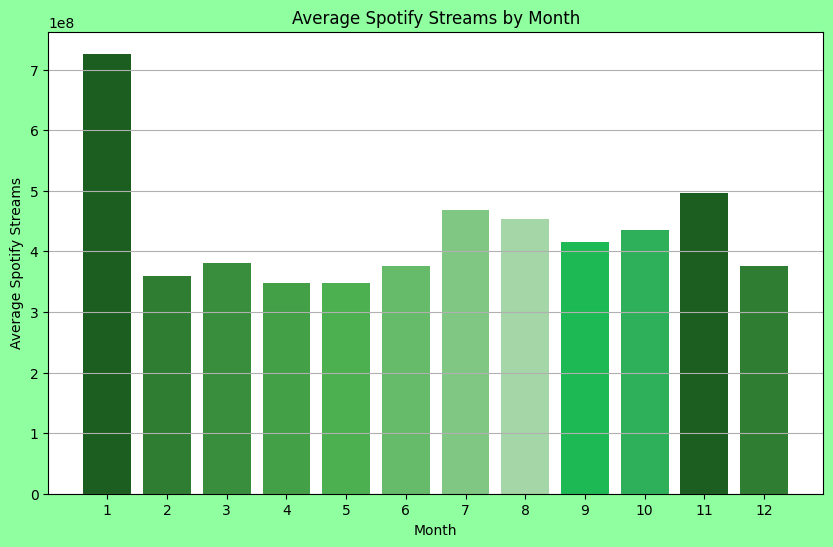

In [15]:
cleaned_file_upload['Month'] = cleaned_file_upload['Release Date'].dt.month

average_streams_by_month = cleaned_file_upload.groupby(
	'Month'
	)[
		'Spotify Streams'
	].mean().reset_index()

fig = plt.figure(figsize=(10, 6))
plt.bar(average_streams_by_month['Month'], average_streams_by_month['Spotify Streams'], 
color = spotify_green_variations)
fig.patch.set_facecolor('xkcd:mint green')
plt.title('Average Spotify Streams by Month')
plt.xlabel('Month')
plt.ylabel('Average Spotify Streams')
plt.xticks(average_streams_by_month['Month'])
plt.grid(axis='y')
plt.show()

**Insights from January's Performance**

Seasonal Trends:

New Year Releases: January often sees a surge in new music releases as artists aim to capitalize on fresh starts and new playlists for the year. This spike could indicate that many tracks were added to playlists during this time.

***Analyze tracks featuring collaborations.***

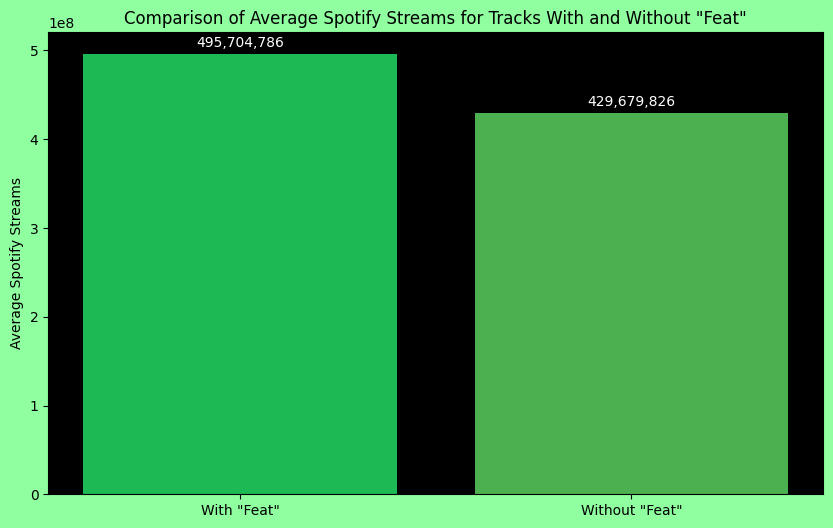

In [16]:
# Identify tracks with and without collaborations
cleaned_file_upload['Has Feat'] = cleaned_file_upload['Track'].apply(lambda x: 'feat' in x)

# Calculate average Spotify streams for both groups
feat_avg_streams = cleaned_file_upload[cleaned_file_upload['Has Feat'] == True]['Spotify Streams'].mean()
no_feat_avg_streams = cleaned_file_upload[cleaned_file_upload['Has Feat'] == False]['Spotify Streams'].mean()

# Data for plotting
labels = ['With "Feat"', 'Without "Feat"']
average_streams = [feat_avg_streams, no_feat_avg_streams]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(labels, average_streams, color=['#1DB954', '#4CAF50'])

# Add titles and labels
ax.set_title('Comparison of Average Spotify Streams for Tracks With and Without "Feat"')
ax.set_ylabel('Average Spotify Streams')
ax.set_facecolor('Black')
fig.patch.set_facecolor('xkcd:mint green')
ax.set_facecolor('Black')

# Adding labels on bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', color='white')

plt.show()

insights:

having a featured artist is  = succes

**Do tracks released on certain days of the week or months perform better?**


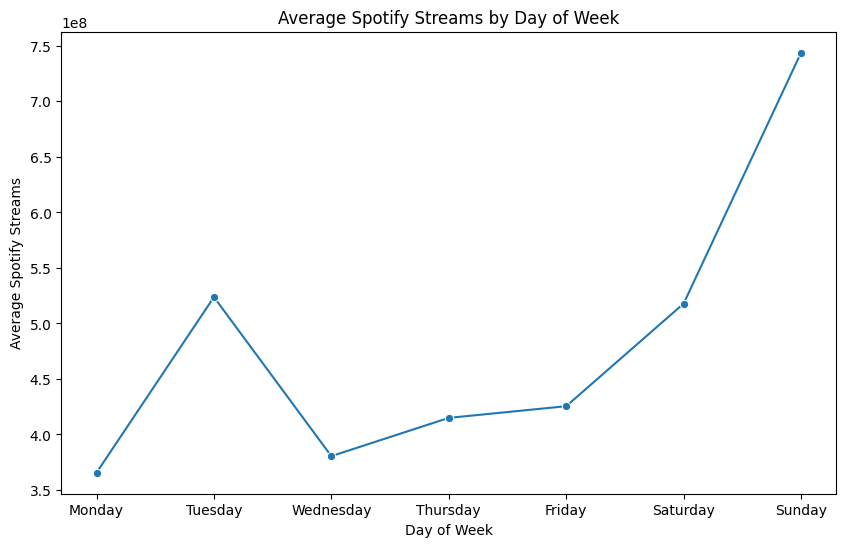

In [17]:
cleaned_file_upload['Day of Week'] = cleaned_file_upload['Release Date'].dt.dayofweek
average_streams_by_day = cleaned_file_upload.groupby(
	'Day of Week'
	)['Spotify Streams'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(
	x='Day of Week', 
	y='Spotify Streams', 
	data=average_streams_by_day, marker='o',
	)
plt.title('Average Spotify Streams by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Spotify Streams')
plt.xticks(range(7), ['Monday',
 'Tuesday', 'Wednesday',
  'Thursday', 'Friday', 'Saturday',
	 'Sunday'])
plt.show()
